<h1>Day 1</h1>

In [54]:
# read data
import re

myfile = open("data\day1.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1 = contents.split('\n')

for i in range(len(day1)):
    day1[i]=int(day1[i])

myfile = open("data\day1_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day1_ex = contents.split('\n')

for i in range(len(day1_ex)):
    day1_ex[i]=int(day1_ex[i])

day1_ex
len(day1_ex)
for i in range(len(day1_ex)):
    print(i)

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

In [31]:
# solution day1 - part 1
def increase_sea_level(ls):
    step = 0
    for i in range(1, len(ls)):
        if ls[i] >= ls[i-1]:
            step+=1
    return step

print(increase_sea_level(day1_ex))
print(increase_sea_level(day1))
# solution day1 - part 2

def increase_sea_level_2(ls):
    step = 0
    sm_before = ls[0] + ls[1] + ls[2]
    for i in range(1, len(ls)-2):
        sm_new = ls[i] + ls[i+1] + ls[i+2]
        if sm_new > sm_before:
            step+=1
        sm_before = sm_new
    return step

print(increase_sea_level_2(day1_ex))
print(increase_sea_level_2(day1))


7
1446
5
1486


<h1>Day 2</h1>

In [33]:
# read data
import re

myfile = open("data\day2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2 = contents.split('\n')

for i in range(len(day2)):
    day2[i]=day2[i].split()

myfile = open("data\day2_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day2_ex = contents.split('\n')

for i in range(len(day2_ex)):
    day2_ex[i]=day2_ex[i].split()

In [36]:
# solution day2 - part 1

def go_sub(ls):
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
        if s[0] == 'down':
            deph+=int(s[1])
        if s[0] == 'up':
            deph-=int(s[1])
    return horz*deph

print(go_sub(day2_ex))
print(go_sub(day2))


# solution day2 - part 2

def go_sub_2(ls):
    aim = 0
    horz = 0
    deph = 0
    for s in ls:
        if s[0] == 'forward':
            horz+=int(s[1])
            deph+=int(s[1])*aim
        if s[0] == 'down':
            aim+=int(s[1])
        if s[0] == 'up':
            aim-=int(s[1])
    return horz*deph

print(go_sub_2(day2_ex))
print(go_sub_2(day2))



150
1427868
900
1568138742


<h1>Day 3 </h1>

In [56]:
# read data

myfile = open("data\day3.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3 = contents.split('\n')

myfile = open("data\day3_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day3_ex = contents.split('\n')

In [75]:
import math

def gamma_epsilon(ls):
    gamma = []
    epsilon = []
    for i in range(len(ls[0])):
        zero = 0
        one = 0
        for j in range(len(ls)):
            if ls[j][i] == '0':
                zero+=1
            if ls[j][i] == '1':
                one+=1
        if zero > one:
            gamma.append(0)
            epsilon.append(1)
        if one > zero:
            gamma.append(1)
            epsilon.append(0)
    return gamma, epsilon


def bin_to_num(ls):
    num = 0
    for i in range(len(ls)):
        num+=int(ls[len(ls)-1-i])*math.pow(2,i)
    return num


gamma, epsilon = gamma_epsilon(day3_ex)
print(bin_to_num(gamma)*bin_to_num(epsilon))

gamma, epsilon = gamma_epsilon(day3)
print(bin_to_num(gamma)*bin_to_num(epsilon))

198.0
4191876.0


In [77]:

def find_o2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero > one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)
    if one >= zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_o2(ls_new, step+1)


def find_co2(ls, step):
    if len(ls) == 1:
        return ls[0]
    zero = 0
    one = 0
    for i in range(len(ls)):
        if ls[i][step] == '0':
            zero+=1
        if ls[i][step] == '1':
            one+=1
    if zero <= one:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '0':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    if one < zero:
        ls_new = []
        for i in range(len(ls)):
            if ls[i][step] == '1':
                ls_new.append(ls[i])
        return find_co2(ls_new, step+1)
    
print(find_o2(day3_ex, 0))
print(find_co2(day3_ex, 0))

print(bin_to_num(find_o2(day3_ex, 0))*bin_to_num(find_co2(day3_ex, 0)))

print(find_o2(day3, 0))
print(find_co2(day3, 0))

print(bin_to_num(find_o2(day3, 0))*bin_to_num(find_co2(day3, 0)))

10111
01010
230.0
010101101111
100110010111
3414905.0


<h1>Day 4</h1>

In [136]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)

role_numbers_ex
boards_ex

[[['22', '13', '17', '11', '0'],
  ['8', '2', '23', '4', '24'],
  ['21', '9', '14', '16', '7'],
  ['6', '10', '3', '18', '5'],
  ['1', '12', '20', '15', '19']],
 [['3', '15', '0', '2', '22'],
  ['9', '18', '13', '17', '5'],
  ['19', '8', '7', '25', '23'],
  ['20', '11', '10', '24', '4'],
  ['14', '21', '16', '12', '6']],
 [['14', '21', '17', '24', '4'],
  ['10', '16', '15', '9', '19'],
  ['18', '8', '23', '26', '20'],
  ['22', '11', '13', '6', '5'],
  ['2', '0', '12', '3', '7']]]

In [126]:
def bingo(role_numbers, boards):
    lsij = []
    for borad in boards:
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5:
                            print('BINGO!!!')
                            return boards[k], num

winning_board_ex, last_number_ex = bingo(role_numbers_ex, boards_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(winning_board_ex[i][j])

print(sm_ex*int(last_number_ex))


winning_board, last_number = bingo(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(winning_board[i][j])

print(sm_ex*int(last_number))

BINGO!!!
4512
BINGO!!!
44736


In [146]:
# read data

myfile = open("data\day4.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4 = contents.split('\n\n')
role_numbers = day4[0].split(',')
boards = []
for board in day4[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards.append(sp_brd)

role_numbers
boards


myfile = open("data\day4_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day4_ex = contents.split('\n\n')
role_numbers_ex = day4_ex[0].split(',')
boards_ex = []
for board in day4_ex[1:]:
    sp_brd = []
    brd = board.split('\n')
    for b in brd:
        if b[0] == ' ':
            b = b[1:]
        bb = b.replace('  ', ' ').split(' ')
        sp_brd.append(bb)
    boards_ex.append(sp_brd)


def bingo_lose(role_numbers, boards):
    ls_idx=[]
    lsij = []
    for borad in boards:
        ls_idx.append(0)
        i5 = []
        j5 = []
        for i in range(5):     
            i5.append(0)
            j5.append(0)
        lsij.append({'i5':i5,'j5':j5})
    for num in role_numbers:
        for k in range(len(boards)):
            for i in range(5):
                for j in range(5):
                    if boards[k][i][j] == num:
                        boards[k][i][j] = 0
                        lsij[k]['i5'][i]+=1
                        lsij[k]['j5'][j]+=1
                        if (lsij[k]['j5'][j] == 5 or lsij[k]['i5'][i] == 5) and ls_idx[k]==0:
                            ls_idx[k]=1
                            remember_idx=k
        if sum(ls_idx) == len(boards):
            return boards[remember_idx], num


lose_board_ex, last_number_ex = bingo_lose(role_numbers_ex, boards_ex)
print(lose_board_ex, last_number_ex)
sm_ex=0
for i in range(5):
    for j in range(5):
        sm_ex+=int(lose_board_ex[i][j])

print(sm_ex*int(last_number_ex))


lose_board, last_number = bingo_lose(role_numbers, boards)
sm=0
for i in range(5):
    for j in range(5):
        sm+=int(lose_board[i][j])

print(sm*int(last_number))



[['3', '15', 0, 0, '22'], [0, '18', 0, 0, 0], ['19', '8', 0, '25', 0], ['20', 0, 0, 0, 0], [0, 0, 0, '12', '6']] 13
1924
1827


149

<h1>Day 5</h1>

In [149]:
# read data

myfile = open("data\day5.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5 = contents.split('\n')

ls_xy = []
for xy in day5:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )


myfile = open("data\day5_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day5_ex = contents.split('\n')

ls_xy_ex = []
for xy in day5_ex:
    vects = xy.split(' -> ')
    xy1 = vects[0].split(',')
    xy2 = vects[1].split(',')
    ls_xy_ex.append(
        {
            'x1':int(xy1[0]),
            'y1':int(xy1[1]),
            'x2':int(xy2[0]),
            'y2':int(xy2[1]),
        }
    )
 

[{'x1': 0, 'y1': 9, 'x2': 5, 'y2': 9},
 {'x1': 8, 'y1': 0, 'x2': 0, 'y2': 8},
 {'x1': 9, 'y1': 4, 'x2': 3, 'y2': 4},
 {'x1': 2, 'y1': 2, 'x2': 2, 'y2': 1},
 {'x1': 7, 'y1': 0, 'x2': 7, 'y2': 4},
 {'x1': 6, 'y1': 4, 'x2': 2, 'y2': 0},
 {'x1': 0, 'y1': 9, 'x2': 2, 'y2': 9},
 {'x1': 3, 'y1': 4, 'x2': 1, 'y2': 4},
 {'x1': 0, 'y1': 0, 'x2': 8, 'y2': 8},
 {'x1': 5, 'y1': 5, 'x2': 8, 'y2': 2}]

In [155]:
# puzzle 1
def rows_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
    return mp


mp_ex = rows_vens(ls_xy_ex, 10)
sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
sm_ex

mp = rows_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1
sm

6666

In [167]:
# puzzle 2
def all_vens(ls_xy, n):
    mp = []
    for i in range(n):
        m = []
        for j in range(n):
            m.append(0)
        mp.append(m)
    for rw in ls_xy:
        if rw['x1'] == rw['x2']:
            for i in range(rw['y1'],rw['y2']+1):
                mp[rw['x1']][i]+=1
            for i in range(rw['y2'],rw['y1']+1):
                mp[rw['x1']][i]+=1
        if rw['y1'] == rw['y2']:
            for i in range(rw['x1'],rw['x2']+1):
                mp[i][rw['y1']]+=1
            for i in range(rw['x2'],rw['x1']+1):
                mp[i][rw['y1']]+=1
        if rw['x1'] != rw['x2'] and rw['y1'] != rw['y2']:
            m = (rw['y1'] - rw['y2'])/(rw['x1'] - rw['x2'])
            n = rw['y1'] - (rw['x1']*m)
            if m == 1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] + i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] + i]+=1
            if m == -1:
                if rw['x1'] < rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x1'] + i][rw['y1'] - i]+=1
                if rw['x1'] > rw['x2']:
                    for i in range(abs(rw['x1'] - rw['x2'])+1):
                        mp[rw['x2'] + i][rw['y2'] - i]+=1
            
    return mp

mp_ex = all_vens(ls_xy_ex, 10)

sm_ex = 0
for i in range(len(mp_ex)):
    for j in range(len(mp_ex[0])):
        if mp_ex[i][j]>=2:
            sm_ex+=1
mp = all_vens(ls_xy, 1000)
sm = 0
for i in range(len(mp)):
    for j in range(len(mp[0])):
        if mp[i][j]>=2:
            sm+=1

print(sm_ex)
print(sm)


12
19081


<h1>Day 6</h1>

In [174]:
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


In [184]:
# puzzle 1
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish(ls, days):
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        print(len(ls))
    return len(ls)

print(num_lanternfish(day6_ex, 80))
print(num_lanternfish(day6, 80))

5934
391888


<AxesSubplot:>

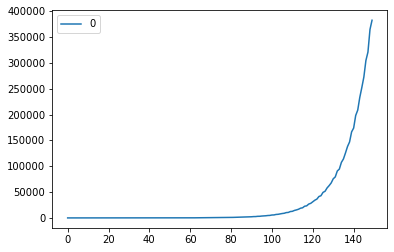

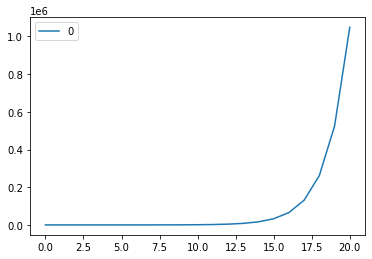

In [195]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def num_lanternfish_plot_one(ls, days):
    lss = []
    for day in range(days):
        for i in range(len(ls)):
            ls[i]-= 1
            if ls[i] == -1:
                ls[i] = 6
                ls.append(8)
        lss.append(len(ls))
    pd.DataFrame(lss).plot()

num_lanternfish_plot_one([6],150)

lss = []
for i in range(int(150/7)):
    lss.append(math.pow(2,i))
pd.DataFrame(lss).plot()


In [206]:
# puzzle 2
# read data

myfile = open("data\day6.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6 = contents.split(',')
for i in range(len(day6)):
    day6[i]=int(day6[i])

myfile = open("data\day6_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day6_ex = contents.split(',')
for i in range(len(day6_ex)):
    day6_ex[i]=int(day6_ex[i])


def num_lanternfish_scale(ls, days):
    int_dic = {
        0:0,
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0,
    }
    for lanter in ls:
        int_dic[lanter]+=1
    for day in range(days):
        save8 = int_dic[0]
        for i in range(1,9):
            int_dic[i-1] = int_dic[i]
        int_dic[8] = save8
        int_dic[6]+= save8
    return int_dic

final_dic_ex = num_lanternfish_scale(day6_ex,256)
sm_ex = 0
for i in range(9):
    sm_ex+=final_dic_ex[i]
print(sm_ex)

final_dic = num_lanternfish_scale(day6,256)
sm = 0
for i in range(9):
    sm+=final_dic[i]
print(sm)



26984457539
1754597645339


<h1>Day 7</h1>

In [100]:
myfile = open("data\day7.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day7 = contents.split(',')
for i in range(len(day7)):
    day7[i] = int(day7[i])

myfile = open("data\day7_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day7_ex = contents.split(',')
for i in range(len(day7_ex)):
    day7_ex[i] = int(day7_ex[i])
day7_ex



[16, 1, 2, 0, 4, 2, 7, 1, 2, 14]

In [101]:
import numpy as np

arr = np.array(day7)

sum(abs(arr - np.median(arr)))


349769.0

In [87]:
import math
arr = np.array(day7)

arr_final = abs(arr - math.floor(arr.mean()))

sm1 = 0
for num in arr_final:
    sm1+=sum(range(num+1))

arr_final = abs(arr - math.ceil(arr.mean()))

sm2 = 0
for num in arr_final:
    sm2+=sum(range(num+1))

min(sm1, sm2)


99540554

In [95]:
import matplotlib.pyplot as plt
import math
import pandas as pd
ls = []

for i in range(1000):
    arr = np.array(day7)
    arr_final = abs(arr - i)
    sm = 0
    for num in arr_final:
        sm+=sum(range(num+1))
    ls.append({'num': i, 'sm' : sm})

df = pd.DataFrame(ls)

<AxesSubplot:>

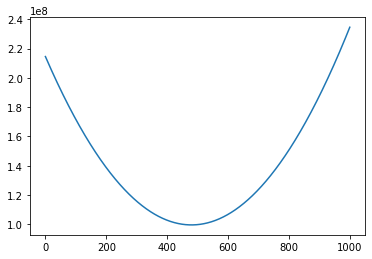

In [97]:
df.sm.plot()

<h1>Day 8</h1>

In [109]:
myfile = open("data\day8.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8 = contents.split('\n')
ls8 = []
for i in range(len(day8)):
    spl = day8[i].split(' | ')
    ls8.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
ls8   

myfile = open("data\day8_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8_ex = contents.split('\n')
ls8_ex = []
for i in range(len(day8_ex)):
    spl = day8_ex[i].split(' | ')
    ls8_ex.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
ls8_ex   


[{'values': ['be',
   'cfbegad',
   'cbdgef',
   'fgaecd',
   'cgeb',
   'fdcge',
   'agebfd',
   'fecdb',
   'fabcd',
   'edb'],
  'targets': ['fdgacbe', 'cefdb', 'cefbgd', 'gcbe']},
 {'values': ['edbfga',
   'begcd',
   'cbg',
   'gc',
   'gcadebf',
   'fbgde',
   'acbgfd',
   'abcde',
   'gfcbed',
   'gfec'],
  'targets': ['fcgedb', 'cgb', 'dgebacf', 'gc']},
 {'values': ['fgaebd',
   'cg',
   'bdaec',
   'gdafb',
   'agbcfd',
   'gdcbef',
   'bgcad',
   'gfac',
   'gcb',
   'cdgabef'],
  'targets': ['cg', 'cg', 'fdcagb', 'cbg']},
 {'values': ['fbegcd',
   'cbd',
   'adcefb',
   'dageb',
   'afcb',
   'bc',
   'aefdc',
   'ecdab',
   'fgdeca',
   'fcdbega'],
  'targets': ['efabcd', 'cedba', 'gadfec', 'cb']},
 {'values': ['aecbfdg',
   'fbg',
   'gf',
   'bafeg',
   'dbefa',
   'fcge',
   'gcbea',
   'fcaegb',
   'dgceab',
   'fcbdga'],
  'targets': ['gecf', 'egdcabf', 'bgf', 'bfgea']},
 {'values': ['fgeab',
   'ca',
   'afcebg',
   'bdacfeg',
   'cfaedg',
   'gcfdb',
   'baec',
   'b

In [124]:
# pazzle 1

# 1 : 2
# 4 : 4
# 7 : 3
# 8 : 7
sm = 0
ls_unique = []
for i in range(len(ls8)):
    for s in ls8[i]['targets']:
        if len(s) in (2,4,3,7):
            ls_unique.append(s)

len(ls_unique)

543

In [241]:
# pazzle 2

myfile = open("data\day8.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8 = contents.split('\n')
for i in range(len(day8)):
    spl = day8[i].split(' | ')
    ls8.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })
   

myfile = open("data\day8_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day8_ex = contents.split('\n')
ls8_ex = []
for i in range(len(day8_ex)):
    spl = day8_ex[i].split(' | ')
    ls8_ex.append({
        'values':spl[0].split(' '),
        'targets':spl[1].split(' '),
    })


def sevent_segment_display(ls8):
    # getting all strings to group numbers
    list_of_num = []
    for i in range(len(ls8)):
        num_dic = { 0: [], 1: [],2: [], 3: [],4: [], 5: [],6: [], 7: [],8: [], 9: []}
        for s in ls8[i]['targets']:
            num_dic[len(s)].append(s)
            num_dic[len(s)] = list(set(num_dic[len(s)]))
        for s in ls8[i]['values']:
            num_dic[len(s)].append(s)
            num_dic[len(s)] = list(set(num_dic[len(s)]))
        for num in num_dic:
            for j in range(len(num_dic[num])):
                num_dic[num][j] = ''.join(sorted(num_dic[num][j]))
            num_dic[num] = list(set(num_dic[num]))
        list_of_num.append(num_dic)

    # getting every row to a DF by letter index
    ls_df = []
    for row in list_of_num:
        ls_nm = []
        dic_le = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}
        for l1 in row.values():
            for s in l1:
                dic_le = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}
                for char in s:
                    dic_le[char]=1
                ls_nm.append(dic_le)
        df = pd.DataFrame(ls_nm)
        ls_df.append(df)

    #  0:      1:      2:      3:      4:
    # aaaa    ....    aaaa    aaaa    ....
    #b    c  .    c  .    c  .    c  b    c
    #b    c  .    c  .    c  .    c  b    c
    # ....    ....    dddd    dddd    dddd
    #e    f  .    f  e    .  .    f  .    f
    #e    f  .    f  e    .  .    f  .    f
    # gggg    ....    gggg    gggg    ....

    #  5:      6:      7:      8:      9:
    # aaaa    aaaa    aaaa    aaaa    aaaa
    #b    .  b    .  .    c  b    c  b    c
    #b    .  b    .  .    c  b    c  b    c
    # dddd    dddd    ....    dddd    dddd
    #.    f  e    f  .    f  e    f  .    f
    #.    f  e    f  .    f  e    f  .    f
    # gggg    gggg    ....    gggg    gggg

    dic_numbers = { 'abcefg' : '0',
        'cf':'1',
        'acdeg':'2',
        'acdfg':'3',
        'bcdf':'4',
        'abdfg':'5',
        'abdefg':'6',
        'acf':'7',
        'abcdefg':'8',
        'abcdfg':'9'
        }

    sm_final = 0
    for i in range(len(ls_df)):
        # al rows have the same valus, aggregate and match
        clm = ls_df[i].columns
        arr = ls_df[i].to_numpy()
        cl_sum = arr.sum(0)
        rw_sum = arr.sum(1)
        dic_trns = {}
        for j in range(cl_sum.shape[0]):
            # these was manully solve from the first example
            if cl_sum[j] == 4 and sum(rw_sum*arr.T[j]) == 24:
                dic_trns[clm[j]] = 'e'
            if cl_sum[j] == 8 and sum(rw_sum*arr.T[j]) == 38:
                dic_trns[clm[j]] = 'c'
            if cl_sum[j] == 7 and sum(rw_sum*arr.T[j]) == 38:
                dic_trns[clm[j]] = 'd'
            if cl_sum[j] == 8 and sum(rw_sum*arr.T[j]) == 43:
                dic_trns[clm[j]] = 'a'
            if cl_sum[j] == 9 and sum(rw_sum*arr.T[j]) == 44:
                dic_trns[clm[j]] = 'f'
            if cl_sum[j] == 7 and sum(rw_sum*arr.T[j]) == 40:
                dic_trns[clm[j]] = 'g'
            if cl_sum[j] == 6 and sum(rw_sum*arr.T[j]) == 34:
                dic_trns[clm[j]] = 'b'
        final_number = ''
        # replace target strings
        for j in range(len(ls8[i]['targets'])):
            for k in range(len(ls8[i]['targets'][j])):
                ls8[i]['targets'][j] = ls8[i]['targets'][j][:k] + dic_trns[ls8[i]['targets'][j][k]] + ls8[i]['targets'][j][k+1:]
            ls8[i]['targets'][j] = ''.join(sorted(ls8[i]['targets'][j]))
            #transform number
            final_number = final_number + dic_numbers[ls8[i]['targets'][j]]
        #sum up
        sm_final+=int(final_number)
    return sm_final


print(sevent_segment_display(ls8_ex))
            
print(sevent_segment_display(ls8))


61229
994266


<h1>Day 9</h1>

In [254]:
myfile = open("data\day9.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day9 = contents.split('\n')
ls9 = []
for i in range(len(day9)):
    ls9.append([int(x) for x in day9[i]])


myfile = open("data\day9_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day9_ex = contents.split('\n')
ls9_ex = []
for i in range(len(day9_ex)):
    ls9_ex.append([int(x) for x in day9_ex[i]])
ls9_ex


[[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
 [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
 [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
 [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
 [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]]

In [376]:
# pazzle 1
def deep(ls):
    mtrx = np.ones([len(ls) + 2,len(ls[0]) + 2])*10
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            mtrx[i+1][j+1] = ls[i][j]
    sm = 0
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            if mtrx[i+1][j+1] < mtrx[i][j+1] and mtrx[i+1][j+1] < mtrx[i+1][j] and mtrx[i+1][j+1] < mtrx[i+2][j+1] and mtrx[i+1][j+1] < mtrx[i+1][j+2]:
                sm+=mtrx[i+1][j+1]+1
    return sm

print(deep(ls9_ex))
print(deep(ls9))

[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]]
[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10.  2.  1.  9.  9.  9.  4.  3.  2.  1.  0. 10.]
 [10.  3.  9.  8.  7.  8.  9.  4.  9.  2.  1. 10.]
 [10.  9.  8.  5.  6.  7.  8.  9.  8.  9.  2. 10.]
 [10.  8.  7.  6.  7.  8.  9.  6.  7.  8.  9. 10.]
 [10.  9.  8.  9.  9.  9.  6.  5.  6.  7.  8. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]]
15.0


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0. 0. 4. 4. 4. 4. 4. 0.]
 [0. 2. 0. 3. 3. 3. 0. 4. 0. 4. 4. 0.]
 [0. 0. 3. 3. 3. 3. 3. 0. 5. 0. 4. 0.]
 [0. 3. 3. 3. 3. 3. 0. 5. 5. 5. 0. 0.]
 [0. 0. 3. 0. 0. 0. 5. 5. 5. 5. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1134


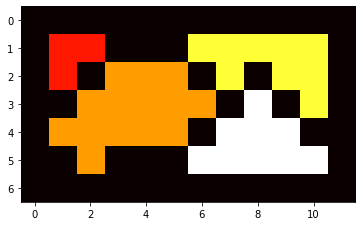

In [359]:
# pazzle 2

def get_matrix(ls):
    mtrx = np.zeros([len(ls) + 2,len(ls[0]) + 2])
    for i in range(len(ls)):
        for j in range(len(ls[0])):
            if ls[i][j] != 9:
                mtrx[i+1][j+1] = 1
    return mtrx

def find_block(mtrx, cnt, i, j):
    mtrx[i, j] = cnt
    if mtrx[i + 1, j] == 1:
        find_block(mtrx, cnt, i + 1, j)
    if mtrx[i, j + 1] == 1:
        find_block(mtrx, cnt, i, j + 1)
    if mtrx[i - 1, j] == 1:
        find_block(mtrx, cnt, i - 1, j)
    if mtrx[i, j - 1] == 1:
        find_block(mtrx, cnt, i, j - 1)
    return mtrx


mtrx = get_matrix(ls9_ex)
#print(mtrx)

cnt = 2
for i in range(1,mtrx.shape[1]-1):
    for j in range(1,mtrx.shape[0]-1):
        if mtrx[j][i] == 1:
            mtrx = find_block(mtrx, cnt, j, i)
            cnt+=1
print(mtrx)

# higher then 1008576
plt.imshow(mtrx, cmap='hot', interpolation='nearest')

## grouping and gettng the answer
groups, counts = np.unique(mtrx, return_counts=True)
counts.sort()
print(counts[-2]*counts[-3]*counts[-4])



In [375]:
import time

ls_time = []
for t in range(100):
    

    mtrx = get_matrix(ls9)
    #print(mtrx)
    to = time.time()
    cnt = 2
    for i in range(1,mtrx.shape[1]-1):
        for j in range(1,mtrx.shape[0]-1):
            if mtrx[j][i] == 1:
                mtrx = find_block(mtrx, cnt, j, i)
                cnt+=1
    #print(mtrx)

    # higher then 1008576
    #plt.imshow(mtrx, cmap='hot', interpolation='nearest')

    ## grouping and gettng the answer
    groups, counts = np.unique(mtrx, return_counts=True)
    counts.sort()
    counts[-2]*counts[-3]*counts[-4]

    ls_time.append(time.time() - to)

sum(ls_time)

2.7249863147735596

<h1>Day 10</h1>

In [377]:
myfile = open("data\day10.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day10 = contents.split('\n')

myfile = open("data\day10_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day10_ex = contents.split('\n')

day10_ex

['[({(<(())[]>[[{[]{<()<>>',
 '[(()[<>])]({[<{<<[]>>(',
 '{([(<{}[<>[]}>{[]{[(<()>',
 '(((({<>}<{<{<>}{[]{[]{}',
 '[[<[([]))<([[{}[[()]]]',
 '[{[{({}]{}}([{[{{{}}([]',
 '{<[[]]>}<{[{[{[]{()[[[]',
 '[<(<(<(<{}))><([]([]()',
 '<{([([[(<>()){}]>(<<{{',
 '<{([{{}}[<[[[<>{}]]]>[]]']

In [390]:
close_dic = {
    ']':'[',
    ')':'(',
    '}':'{',
    '>':'<'
    }
open_list = ['[','(','{','<']
dic_score = {
    ')': 3,
    ']': 57,
    '}': 1197,
    '>': 25137
    }

def count_miss(day):
    sm_fail = 0
    for s in day:
        ls_check = []
        go = True
        i = 0
        while go==True and i < len(s):
            char = s[i]
            if char in open_list:
                ls_check.append(char)
            else:
                if close_dic[char] == ls_check[-1]:
                    ls_check = ls_check[:-1]
                else:
                    sm_fail+=dic_score[char]
                    go=False
            i+=1
    return sm_fail

print(count_miss(day10_ex))
print(count_miss(day10))


26397
392043


In [400]:
def get_not_corrapted(day):
    missing_list = []
    for s in day:    
        ls_check = []
        go = True
        i = 0
        while go==True and i < len(s):
            char = s[i]
            if char in open_list:
                ls_check.append(char)
            else:
                if close_dic[char] == ls_check[-1]:
                    ls_check = ls_check[:-1]
                else:
                    go=False
            i+=1
        if i == len(s):
            missing_list.append(ls_check)
    return missing_list



dic_score_open = {
    '(': 1,
    '[': 2,
    '{': 3,
    '<': 4
    }

def get_median_score(missing_list):
    ls_scores = []
    for s in missing_list:
        sm = 0
        for i in range(len(s)):
            k = len(s)-i-1
            sm = (5*sm) + dic_score_open[s[k]]
        ls_scores.append(sm)

    ls_scores.sort()
    return ls_scores[int(len(ls_scores)/2)]


print(get_median_score(get_not_corrapted(day10_ex)))
print(get_median_score(get_not_corrapted(day10)))

288957
1605968119


<h1>Day 11</h1>

In [527]:
# pazzle 1
import numpy as np

myfile = open("data\day11.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11 = contents.split('\n')

mtrx11 = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11[i][j] = int(day11[i][j])

myfile = open("data\day11_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11_ex = contents.split('\n')
mtrx11_ex = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11_ex[i][j] = int(day11_ex[i][j])

def pump_lights(mtrx, mtrx_memo):
    if np.where(mtrx >= 9)[0].shape[0] == 0:
        return (mtrx+1)*(mtrx_memo), 100-mtrx_memo.sum()
    else:
        nines = np.where(mtrx >= 9)
        mtrx_temp = np.zeros([12,12])
        mtrx_pad = np.ones([3,3])
        for i in range(nines[0].shape[0]):
            mtrx_temp[nines[0][i]:nines[0][i] + 3,nines[1][i]:nines[1][i] + 3] += mtrx_pad
            mtrx_memo[nines[0][i],nines[1][i]] = 0
        mtrx+=mtrx_temp[1:-1,1:-1]
        mtrx=mtrx*mtrx_memo
        return pump_lights(mtrx, mtrx_memo)

sm_ex = 0
for i in range(100):
    mtrx11_ex,sm1 = pump_lights(mtrx11_ex, np.ones([10,10]))
    sm_ex+=sm1
print(sm_ex)

sm = 0
for i in range(100):
    mtrx11,sm1 = pump_lights(mtrx11, np.ones([10,10]))
    sm+=sm1
print(sm)

1656.0
1642.0


In [528]:
# pazzle 2
import numpy as np

myfile = open("data\day11.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11 = contents.split('\n')

mtrx11 = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11[i][j] = int(day11[i][j])

myfile = open("data\day11_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day11_ex = contents.split('\n')
mtrx11_ex = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        mtrx11_ex[i][j] = int(day11_ex[i][j])


end_round_ex = 0
while mtrx11_ex.sum() != 0:
    mtrx11_ex,sm1 = pump_lights(mtrx11_ex, np.ones([10,10]))
    end_round_ex+=1
print(end_round_ex)

end_round = 0
while mtrx11.sum() != 0:
    mtrx11,sm1 = pump_lights(mtrx11, np.ones([10,10]))
    end_round+=1
print(end_round)

195
320


<h1>Day 12</h1>

In [565]:
# pazzle 1
myfile = open("data\day12_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex = contents.split('\n')
ls_path_12_ex = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex]
dic_path_12_ex = {}
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]] = []
    dic_path_12_ex[ls_path_12_ex[i][1]] = []
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]].append(ls_path_12_ex[i][1])
    dic_path_12_ex[ls_path_12_ex[i][1]].append(ls_path_12_ex[i][0])


{'start': ['A', 'b'],
 'A': ['start', 'c', 'b', 'end'],
 'b': ['start', 'A', 'd', 'end'],
 'c': ['A'],
 'd': ['b'],
 'end': ['A', 'b']}

In [109]:
# pazzle 1
myfile = open("data\day12_ex.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex = contents.split('\n')
ls_path_12_ex = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex]
dic_path_12_ex = {}
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]] = []
    dic_path_12_ex[ls_path_12_ex[i][1]] = []
for i in range(len(ls_path_12_ex)):
    dic_path_12_ex[ls_path_12_ex[i][0]].append(ls_path_12_ex[i][1])
    dic_path_12_ex[ls_path_12_ex[i][1]].append(ls_path_12_ex[i][0])

myfile = open("data\day12_ex2.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex2 = contents.split('\n')
ls_path_12_ex2 = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex2]
dic_path_12_ex2 = {}
for i in range(len(ls_path_12_ex2)):
    dic_path_12_ex2[ls_path_12_ex2[i][0]] = []
    dic_path_12_ex2[ls_path_12_ex2[i][1]] = []
for i in range(len(ls_path_12_ex2)):
    dic_path_12_ex2[ls_path_12_ex2[i][0]].append(ls_path_12_ex2[i][1])
    dic_path_12_ex2[ls_path_12_ex2[i][1]].append(ls_path_12_ex2[i][0])

myfile = open("data\day12_ex3.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12_ex3 = contents.split('\n')
ls_path_12_ex3 = [(path.split('-')[0],path.split('-')[1]) for path in day12_ex3]
dic_path_12_ex3 = {}
for i in range(len(ls_path_12_ex3)):
    dic_path_12_ex3[ls_path_12_ex3[i][0]] = []
    dic_path_12_ex3[ls_path_12_ex3[i][1]] = []
for i in range(len(ls_path_12_ex3)):
    dic_path_12_ex3[ls_path_12_ex3[i][0]].append(ls_path_12_ex3[i][1])
    dic_path_12_ex3[ls_path_12_ex3[i][1]].append(ls_path_12_ex3[i][0])



myfile = open("data\day12.txt", "rt") # open lorem.t'x't for reading te'x't
contents = myfile.read()         # read the entire file to string
myfile.close()                   # close the file
day12 = contents.split('\n')
ls_path_12 = [(path.split('-')[0],path.split('-')[1]) for path in day12]
dic_path_12 = {}
for i in range(len(ls_path_12)):
    dic_path_12[ls_path_12[i][0]] = []
    dic_path_12[ls_path_12[i][1]] = []
for i in range(len(ls_path_12)):
    dic_path_12[ls_path_12[i][0]].append(ls_path_12[i][1])
    dic_path_12[ls_path_12[i][1]].append(ls_path_12[i][0])

In [113]:
A = []

def maze(dic, path, ls_dont_go, rout):
    global A
    if path == 'end':
        A.append(rout)
        return True
    ls_paths = dic[path]
    lss = [ls_dont_go.copy() for i in range(len(ls_paths))]
    routs = [rout.copy() for i in range(len(ls_paths))]
    for i in range(len(ls_paths)):
        new_path = ls_paths[i]
        new_rout = routs[i]
        if new_path not in lss[i]:
            new_rout.append(new_path)
            if new_path.islower():
                lss[i].append(new_path)
            maze(dic, new_path, lss[i], new_rout)

#ex1
for key in dic_path_12_ex:
    if 'start' in dic_path_12_ex[key]:
        dic_path_12_ex[key].remove('start')

A = []
maze(dic_path_12_ex, 'start', ['start'], ['start'])
print(len(A))
print('example:')
for s in A:
    print(s)

#ex2
for key in dic_path_12_ex2:
    if 'start' in dic_path_12_ex2[key]:
        dic_path_12_ex2[key].remove('start')
A = []
maze(dic_path_12_ex2, 'start', ['start'], ['start'])
print(len(A))

#ex3
for key in dic_path_12_ex3:
    if 'start' in dic_path_12_ex3[key]:
        dic_path_12_ex3[key].remove('start')
A = []
maze(dic_path_12_ex3, 'start', ['start'], ['start'])
print(len(A))

#sol
for key in dic_path_12:
    if 'start' in dic_path_12[key]:
        dic_path_12[key].remove('start')
A = []
maze(dic_path_12, 'start', ['start'], ['start'])
print(len(A))


10
example:
['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'end']
['start', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'end']
['start', 'b', 'end']
19
226
4691


In [114]:
#pazzle 2

A = []
def maze_2(dic, path, ls_dont_go, lower, cnt, rout):
    global A
    if path == 'end':
        A.append(rout)
        return True
    ls_paths = dic[path]
    # creating lists of reference
    # lss - caves not to enter
    # routs - all the routs
    # counts - the remember the second small cave
    lss = [ls_dont_go.copy() for i in range(len(ls_paths))]
    routs = [rout.copy() for i in range(len(ls_paths))]
    counts = [cnt for i in range(len(ls_paths))]
    for i in range(len(ls_paths)):
        new_path = ls_paths[i]
        new_rout = routs[i]
        if new_path not in lss[i] :
            new_rout.append(new_path)
            if new_path == lower and counts[i] > 0:
                lss[i].append(new_path)
            if new_path == lower:
                counts[i]+=1
            if new_path.islower() and new_path != lower:
                lss[i].append(new_path)
            maze_2(dic, new_path, lss[i], lower, counts[i], new_rout)

# ex1
lowers = [key for key in dic_path_12_ex if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))
print('example')
for s in [list(x) for x in set(tuple(x) for x in A)]:
    print(s)

# ex2
lowers = [key for key in dic_path_12_ex2 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex2, 'start', ['start'], lower, 0, [])

print(len([list(x) for x in set(tuple(x) for x in A)]))

# ex3
lowers = [key for key in dic_path_12_ex3 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12_ex3, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))

# solution
lowers = [key for key in dic_path_12 if key.islower() and key not in ['start','end']]
A = []
for lower in lowers:
    maze_2(dic_path_12, 'start', ['start'], lower, 0, ['start'])

print(len([list(x) for x in set(tuple(x) for x in A)]))


36
example
['start', 'A', 'c', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'b', 'A', 'b', 'end']
['start', 'b', 'd', 'b', 'end']
['start', 'A', 'c', 'A', 'b', 'A', 'b', 'end']
['start', 'A', 'b', 'A', 'end']
['start', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'd', 'b', 'A', 'end']
['start', 'A', 'b', 'd', 'b', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'b', 'end']
['start', 'A', 'c', 'A', 'b', 'd', 'b', 'A', 'end']
['start', 'b', 'd', 'b', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'end']
['start', 'A', 'b', 'A', 'b', 'A', 'end']
['start', 'A', 'b', 'A', 'c', 'A', 'b', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'b', 'end']
['start', 'b', 'end']
['start', 'b', 'A', 'b', 'A', 'c', 'A', 'end']
['start', 'b', 'A', 'c', 'A', 'c', 'A', 'end']
['start', 'b', 'd', 'b', 'A', 'c', 'A'